# Data Attribute Recommendation - TechED 2023 AI268

Deep dive into Sales Order Completion Business Blueprint of Data Attribute recomendation using File Upload API.

## Business Scenario

We will consider a business scenario involving sales order completion. Based on historical entries in the sales orders, we will create a model to predict the un-entered fields in the sales order that is required for completing the sales order.

This workshop will cover:
    
* Data Upload(AI API)
* Model Training and Deployment(AI API)
* Online Inference Requests
    
We will work through a basic example of how to achieve these tasks using the [python SDK for AI API](https://pypi.org/project/ai-api-client-sdk/)

## How to use this notebook

A Jupyter notebook combines code and documentation. To run the exercises in this workshop, simply follow the instructions in the documentation cells.

Additional information is available through the notebook in hidden boxes marked with the ✐ icon. It is not required to read through these sections, but it is occasionally helpful.

<details>
    <summary><em> ✐ Click this to reveal additional information</em></summary>
    <br/>

Thank you!
</details>

<br/>

To execute the code cells, click the "Play" ▶️ button at the top of your screen. The code cells must be executed in the order that they appear in this notebook.




<details>
    <summary><em> ✐ Doing several runs of the notebook and you get errors?</em></summary>
    <br/>

If you are doing several runs of this notebook on a trial account, you may see errors stating 'The resource can no longer be used. Usage limit has been reached'. It can be beneficial to [clean up the service instance](#Cleaning-up-a-service-instance) to free up limited trial resources acquired by an earlier run of the notebook. [Some limits](https://help.sap.com/viewer/105bcfd88921418e8c29b24a7a402ec3/SHIP/en-US/c03b561eea1744c9b9892b416037b99a.html) cannot be reset this way.
</details>

## Table of Contents

* [Exercise 01.1](#Exercise-01.1) - Installing the SDK and preparing the service key
    * [Creating a service instance and key on BTP Trial](#Creating-a-service-instance-and-key-on-BTP-Trial)
    * [Loading the service key into your Jupyter Notebook](#Loading-the-service-key-into-your-Jupyter-Notebook)
    * [Adding the Sales Order Data into your jupyter notebook](#Adding-the-Sales-Order-Data-into-your-jupyter-notebook)
    * [Installing the SDK](#Installing-the-SDK)
* [Exercise 01.2](#Exercise-01.2) - Uploading the data
* [Exercise 01.3](#Exercise-01.3) - Training the model
* [Exercise 01.4](#Exercise-01.4) - Deploying the Model and predicting labels
* [Resources](#Resources) - Additional reading
* [Addendum](#Addendum)
    * [Cleaning up a service instance](#Cleaning-up-a-service-instance) - Clean up all resources on the service instance

## Requirements


See the [README in the Github repository for this workshop](https://github.com/SAP-samples/teched2023-AI268/blob/main/exercises/ex1/README.md).

# Exercise 01.1

*Back to [table of contents](#Table-of-Contents)*

In exercise 01.1, we will install the SDK and prepare the service key.

## Creating a service instance and key on BTP Trial

Please log in to your trial account: https://cockpit.hanatrial.ondemand.com/trial/

In the your global account screen, go to the "Boosters" tab:

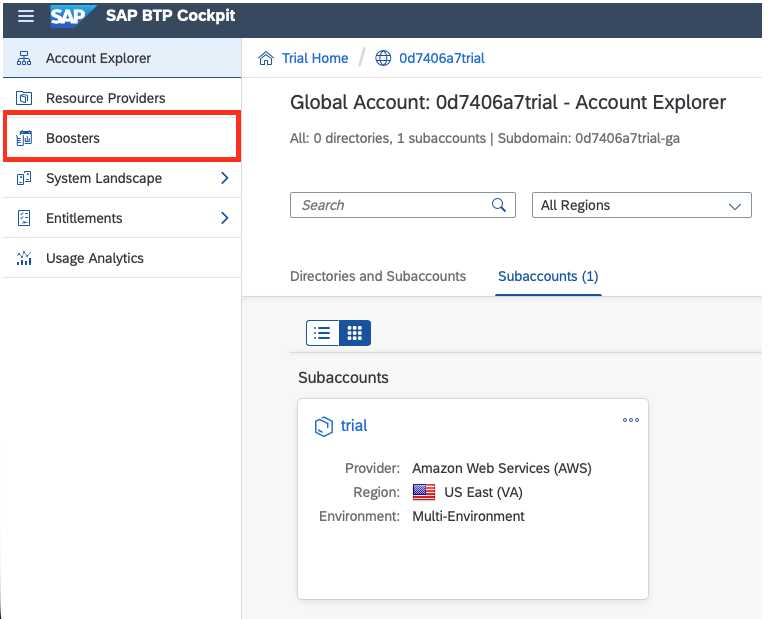

*Boosters are only available on the Trial landscape. If you are using a production environment, please follow this tutorial to manually [create a service instance and a service key](https://developers.sap.com/tutorials/cp-aibus-dar-service-instance.html)*.

In the Boosters tab, enter "Data Attribute Recommendation" into the search box. Then, select the
service tile from the search results: 
    
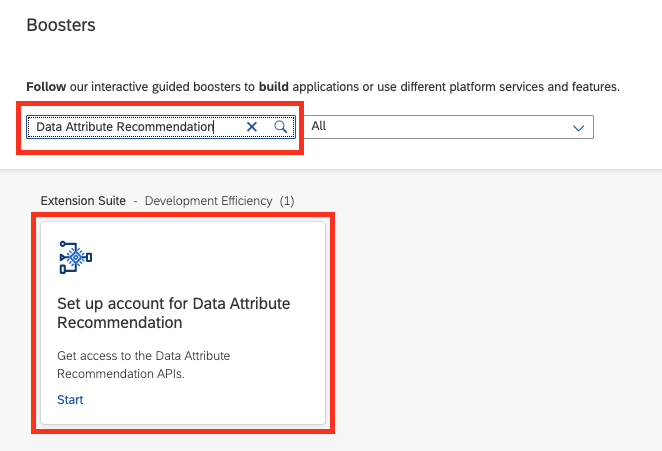

The resulting screen shows details of the booster pack. Here, click the "Start" button and wait a few seconds.

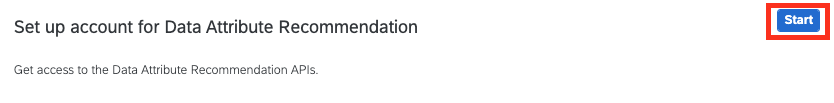

Once the booster is finished, click the "Download Service Key" button to obtain your service key. Your browser will ask you to save the file. Save it in a place where you will be able to find it again, such as your desktop.

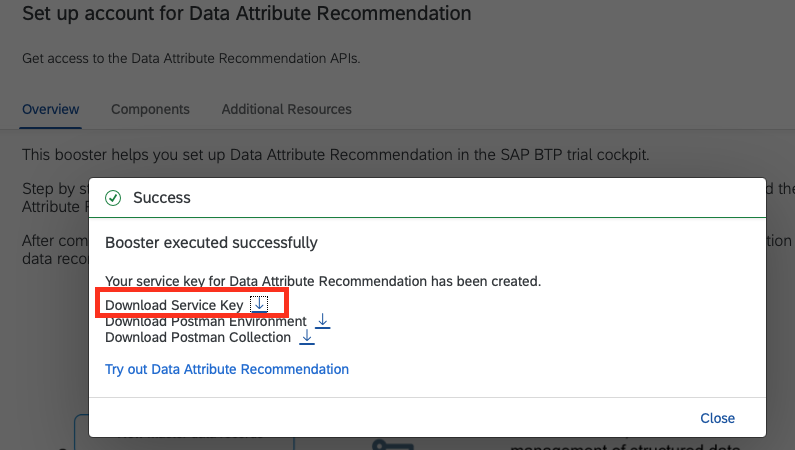

## Loading the service key into your Jupyter Notebook

Once you downloaded the service key from the Cockpit, upload it to your notebook environment. The service key must be uploaded to same directory where the `Sales_Order_Completion_Using_Data_Attribute_Reccomendation.ipynb` file is stored.

When using Jupyterlab, a file browser is visible to the left of the notebook view. Click the upload button here to upload the `default_key.json` file we downloaded earlier from the BTP Cockpit.


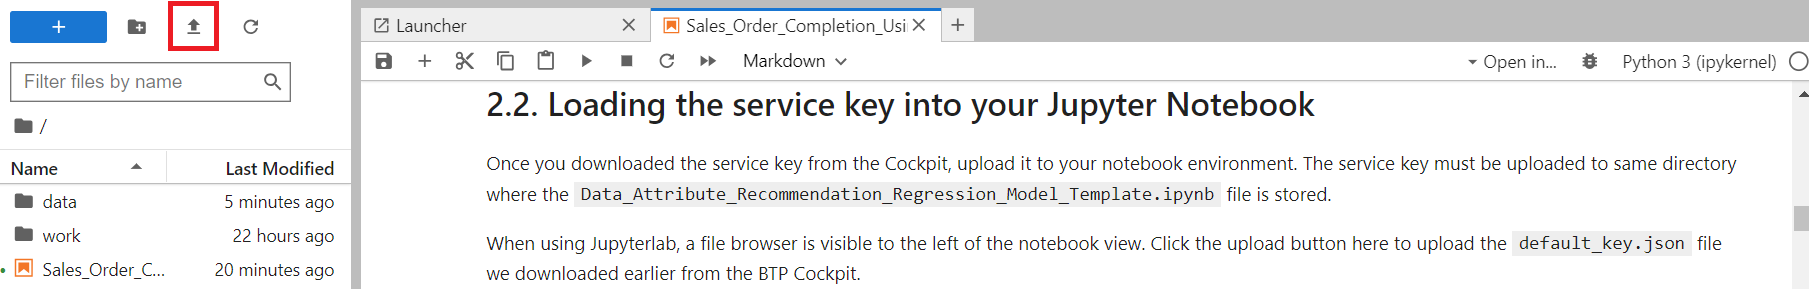

Once you click the upload button, a file chooser dialog will open where you can select the `default_key.json`:

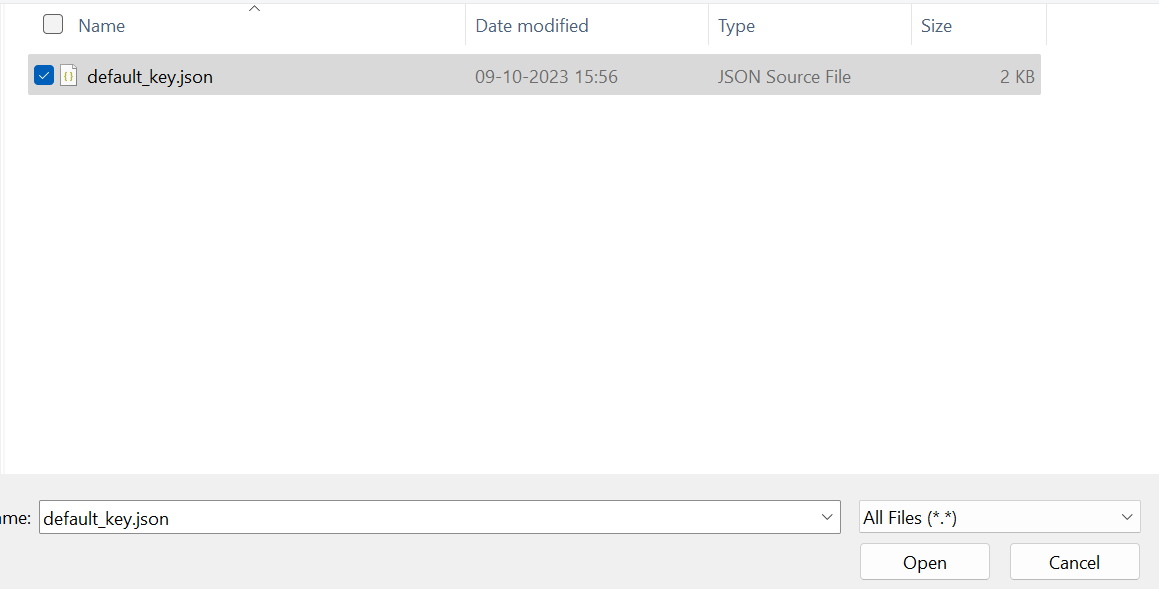


After the upload finished successfully, you should see the `default_key.json` in the file browser.

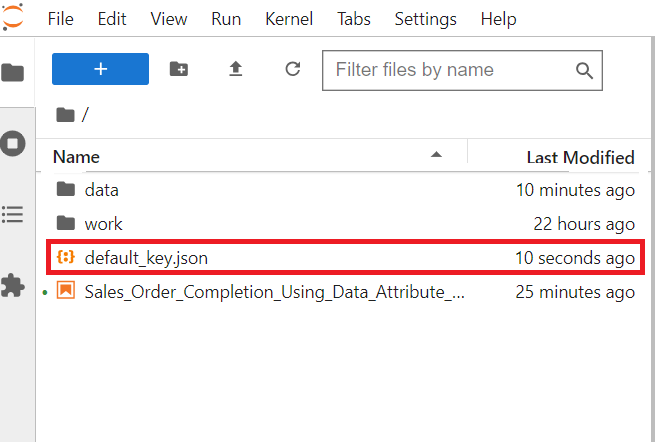

**Make sure that the file name is `default_key.json`. If your service key file has a different name, this notebook will not work.**

The service key contains your credentials to access the service. Please treat this as carefully as you would treat any password. We keep the service key as a separate file outside this notebook to avoid leaking the secret credentials.

The service key is a JSON file. We will load this file once and use the credentials throughout this workshop. 

In [1]:
# First, set up logging so we can see the actions performed by the SDK behind the scenes
import logging
import sys

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

from pprint import pprint # for nicer output formatting

In [2]:
import json
import os

if not os.path.exists("default_key.json"):
    msg = "'default_key.json' is not found. Please follow instructions above to create a service key of"
    msg += " Data Attribute Recommendation. Then, upload it into the same directory where"
    msg += " this notebook is saved."
    print(msg)
    raise ValueError(msg)

with open("default_key.json") as file_handle:
    key = file_handle.read()
    SERVICE_KEY = json.loads(key)
    print("Service URL: ")
    pprint(SERVICE_KEY["url"])
    print("Client ID:")
    pprint(SERVICE_KEY["uaa"]["clientid"])

Service URL: 
'https://aiservices-trial-dar.cfapps.us10.hana.ondemand.com'
Client ID:
'sb-471b990a-0217-4afb-927e-0c6ea9120e7e!b202803|dar-std-trial!b40577'


## Adding the Sales Order Data into your jupyter notebook

You need to load the into the jupyter notebook environment. The data is present in the `data` folder of [this workshop github repository](https://github.com/SAP-samples/teched2023-AI268/tree/main/exercises/ex1/data). You need to clone the github repository locally to get the data. Once the data is prsent in your local laptop, you need to create a new folder called data your jupyter notebook under the same folder in which this notebook is present. To do this click on the "create folder" button which is prssent on the top left corner of the notebook view. Name the folder as data.

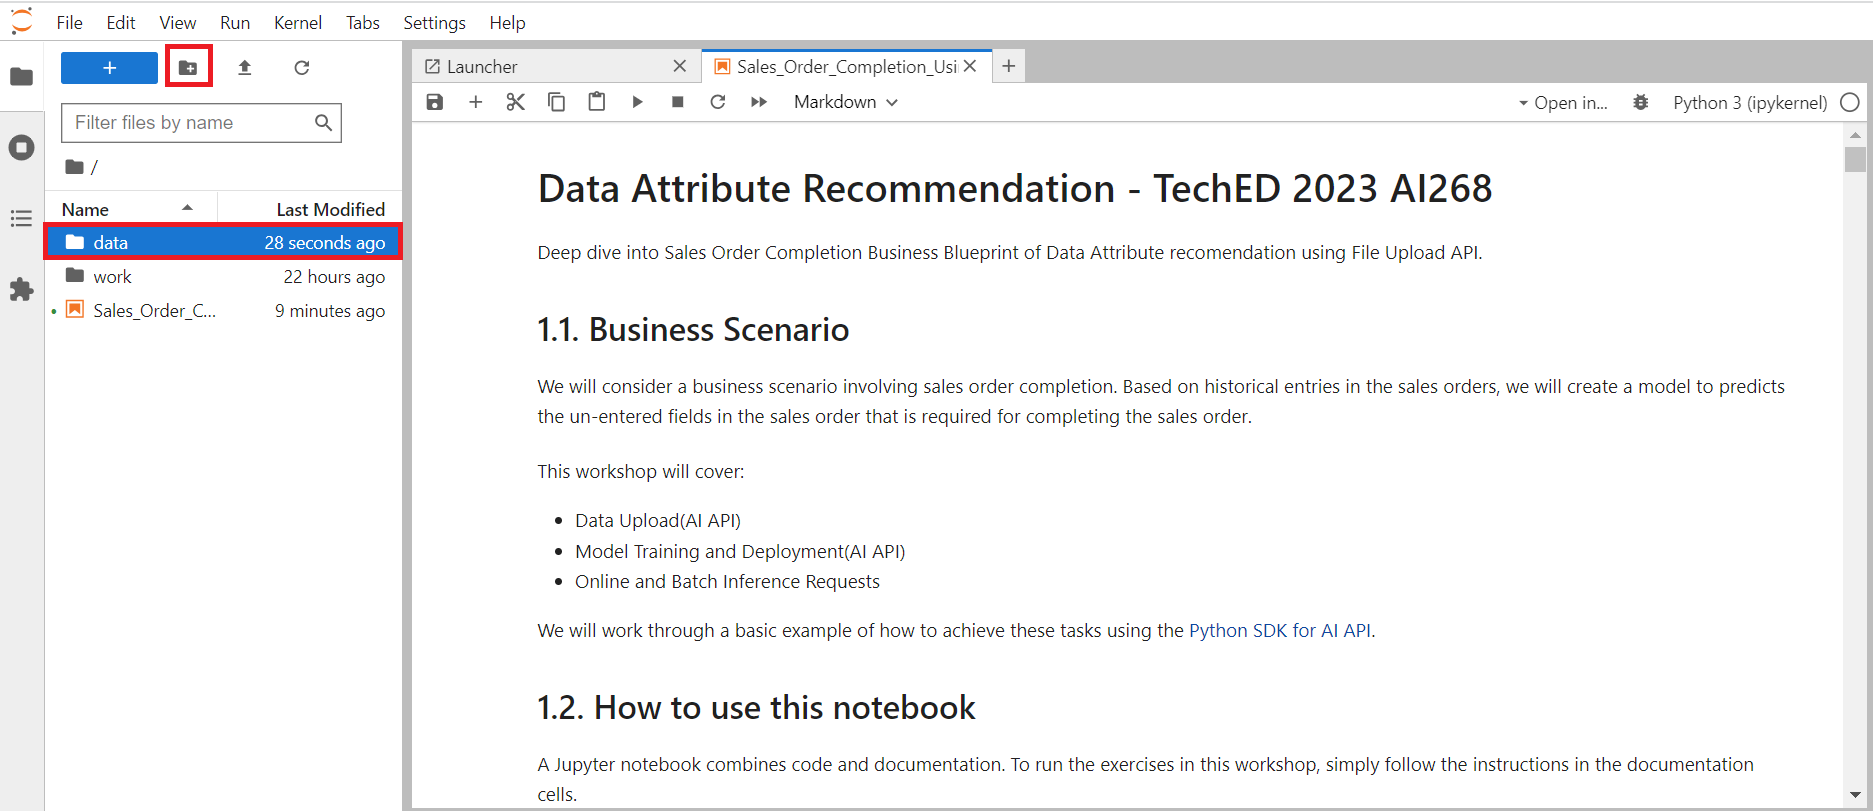

Then double click on the `data` folder to navigate inside the folder. Now click on the "Upload" button which is prssent on the top left corner of the notebook view.

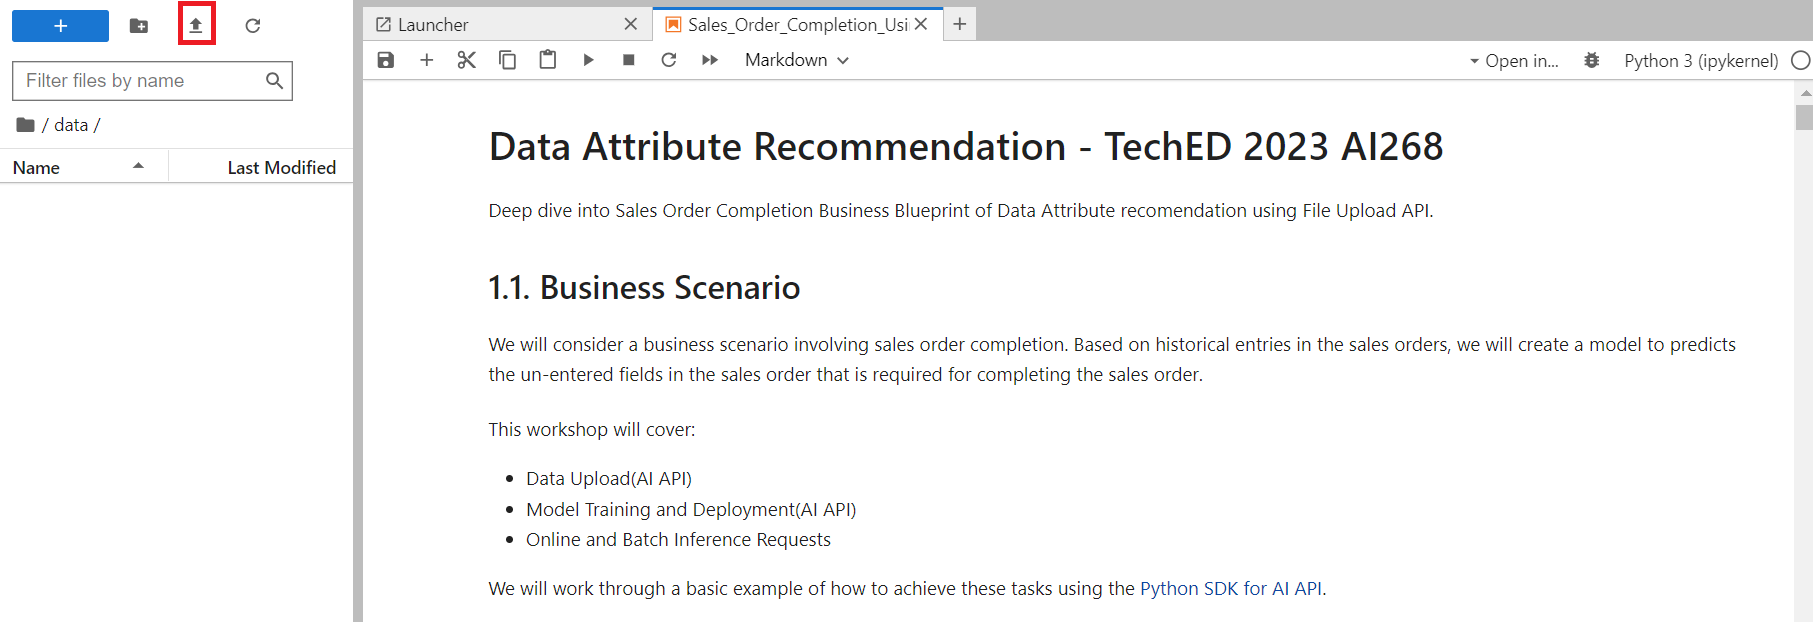

Once you click the upload button, a file chooser dialog will open where you can select two files. `SOC_Data.csv` and `SOC_Schema.json`

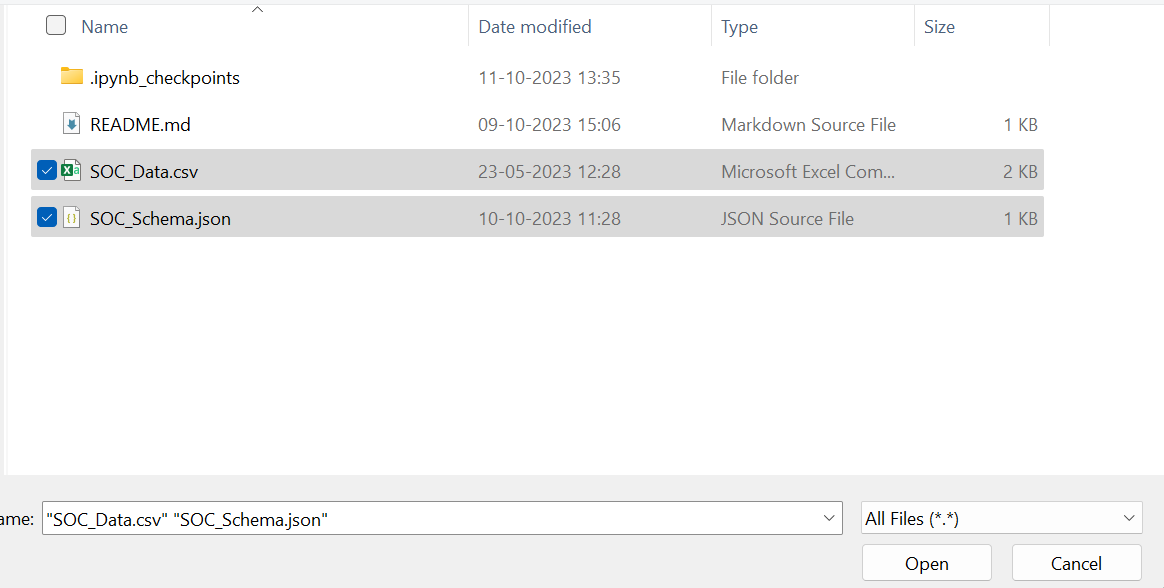

The two files will now appear in the notebook view under the `data` folder. Click on the "root folder" icon to return to the root folder of your jupyter notebook environment where the .ipynb notebook file is present.

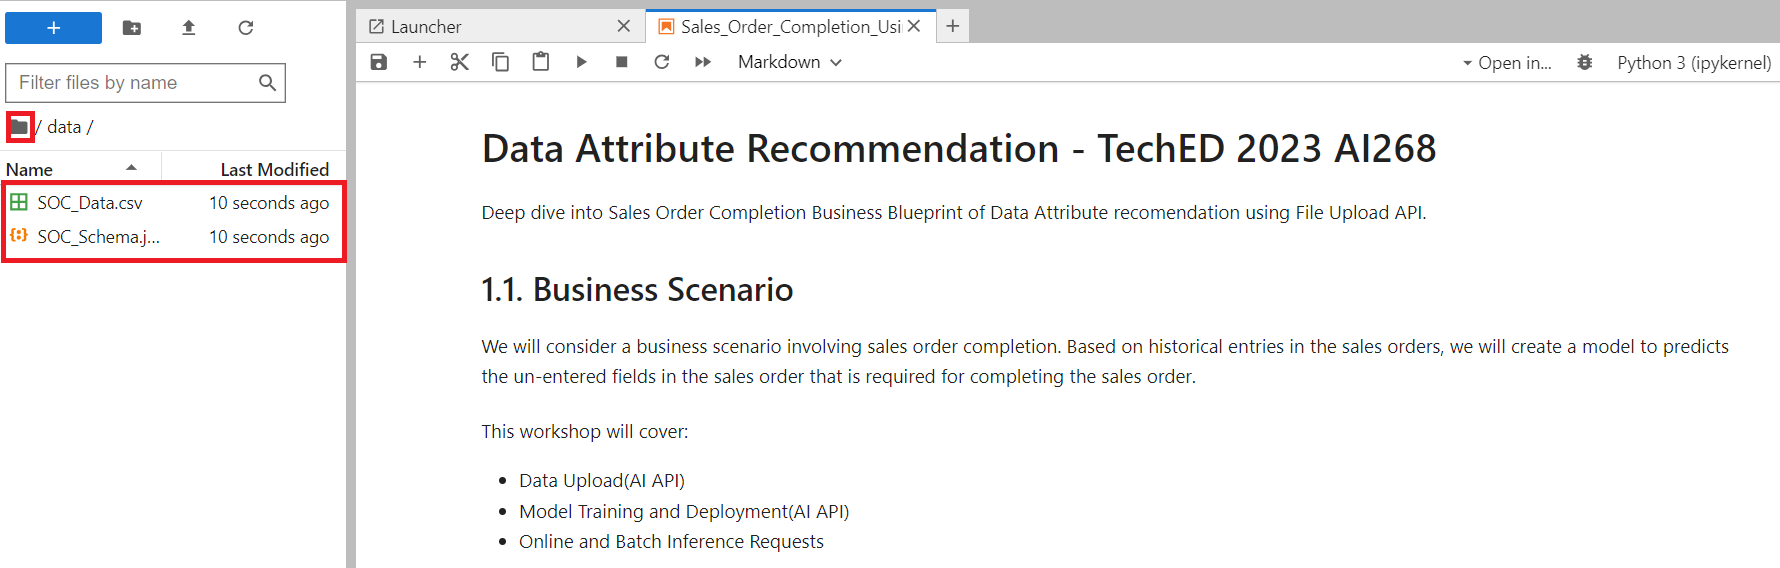

Now we have the data loaded into our jupyter notebook environment.

## Installing the SDK

The SAP AI API SDK is available from the Python package repository. It can be installed with the standard `pip` tool:

In [3]:
! pip install ai-api-client-sdk

  Obtaining dependency information for ai-api-client-sdk from https://files.pythonhosted.org/packages/77/f7/97247d2c923a8d5f0940fdcb2add60160822abd3d406384d02173ebeca20/ai_api_client_sdk-1.28.0-py3-none-any.whl.metadata
  Obtaining dependency information for aenum~=3.1 from https://files.pythonhosted.org/packages/d0/fa/ca0c66b388624ba9dbbf35aab3a9f326bfdf5e56a7237fe8f1b600da6864/aenum-3.1.15-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.4/249.4 kB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 4.6 MB/s eta 0:00:00


### Check the health of your Data Attribute Reccomendation Service Instance

In [4]:
from ai_api_client_sdk.ai_api_v2_client import AIAPIV2Client
from ai_api_client_sdk.resource_clients import HealthzClient

DAR_BASE_URL = SERVICE_KEY["url"]
AIAPI_BASE_PATH = "/model-manager/v2/lm"

client = AIAPIV2Client(
        base_url=DAR_BASE_URL + AIAPI_BASE_PATH,
        auth_url=SERVICE_KEY["uaa"]["url"] + "/oauth/token",
        client_id=SERVICE_KEY["uaa"]["clientid"],
        client_secret=SERVICE_KEY["uaa"]["clientsecret"],
    )
client.healthz = HealthzClient(rest_client=client.rest_client)

In [5]:
client.healthz.rest_client.get(path="/healthz/readiness")

{'message': 'OK', 'status': 'OK'}

##### Proceed with the next steps if the health check returns {'message': 'OK', 'status': 'OK'}

<details>
    <summary><em> ✐ If you are not using a Jupyter notebook</em></summary>
    <br/>
If you are not using a Jupyter notebook, but instead a regular Python development environment, we recommend using a Python virtual environment to set up your development environment. Please see [the dedicated tutorial to learn how to install the SDK inside a Python virtual environment](https://developers.sap.com/tutorials/cp-aibus-dar-sdk-setup.html).

    </details>

## Summary Exercise 01.1

In exercise 01.1, we have covered the following topics:

* How to obtain a service key for the Data Attribute Recommendation service
* How to add the Sales Order data to the jupyter notebook environment
* How to install the SAP AI API client SDK and check the health of your Data Attribute Recommendation service

# Exercise 01.2

*Back to [table of contents](#Table-of-Contents)*
*To perform this exercise, you need to execute the code in all previous exercises.*

In exercise 01.2, we will upload our demo dataset to the service.

## The Dataset

### Obtaining the Data

The dataset we use in this workshop is a CSV file provided by SAP containing historic sales order data. It is meant to only serve as an example for this workshop and for experimentation purpose of this exercise. 

The dataset is available in the Github repository for this workshop in the `data` directory.

Let's inspect the data:

In [6]:
! pip install pandas

In [25]:
# if you are experiencing an import error here, run the following in a new cell:
# ! pip install pandas
import pandas as pd

df = pd.read_csv("data/SOC_Data.csv")
df.head(5)

,SALESDOCUMENT,SALESDOCUMENTITEM,CREATIONDATE,SALESDOCUMENTTYPE,SALESORGANIZATION,DISTRIBUTIONCHANNEL,ORGANIZATIONDIVISION,BILLINGCOMPANYCODE,TRANSACTIONCURRENCY,SALESDOCUMENTITEMCATEGORY,...,BILLTOPARTYREGION,PAYERPARTY,PAYERCOUNTRY,PAYERREGION,SALESOFFICE,SALESGROUP,CUSTOMERPAYMENTTERMS,SHIPPINGCONDITION,PLANT,SHIPPINGPOINT
0,1,10,20231019,OR,1010,10,0,1010,EUR,TAN,...,BW,10100003,DE,BW,120,130,1,6,1010,101C
1,1,20,20231019,OR,1010,10,0,1010,EUR,TANN,...,BW,10100002,DE,BW,130,130,4,1,1010,101C
2,2,10,20231019,OR,1010,10,0,1010,EUR,TAN,...,BW,10100003,DE,BW,100,100,1,6,1010,1010
3,2,20,20231019,OR,1010,10,0,1010,EUR,TANN,...,BW,10100003,DE,BW,100,130,4,1,1010,1010
4,3,10,20231019,OR,1010,10,0,1010,EUR,TAN,...,BW,10100003,DE,BW,100,100,1,6,1010,101C


In [26]:
print(f"Data has {df.shape[0]} rows and {df.shape[1]} columns.")

Data has 587 rows and 29 columns.


The following columns are present in the data:

| Column |
| :--- |
| SALESDOCUMENT |
| SALESDOCUMENTITEM |
| CREATIONDATE |
| SALESDOCUMENTTYPE |
| SALESORGANIZATION |
| DISTRIBUTIONCHANNEL |
| ORGANIZATIONDIVISION |
| BILLINGCOMPANYCODE |
| TRANSACTIONCURRENCY |
| SALESDOCUMENTITEMCATEGORY |
| PRODUCT |
| SOLDTOPARTY |
| SOLDTOPARTYCOUNTRY |
| SOLDTOPARTYREGION |
| SHIPTOPARTY |
| SHIPTOCOUNTRY |
| SHIPTOPARTYREGION |
| BILLTOPARTY |
| BILLTOPARTYCOUNTRY |
| BILLTOPARTYREGION |
| PAYERPARTY |
| PAYERCOUNTRY |
| PAYERREGION |
| **SALESOFFICE** |
| **SALESGROUP** |
| **CUSTOMERPAYMENTTERMS** |
| **SHIPPINGCONDITION** |
| **PLANT** |
| **SHIPPINGPOINT** |

The mandatory features are **`SALESDOCUMENT`** and **`SALESDOCUMENTITEM`**.
These are not used by the model. It is used to ensure that all the sales entries for a given **`SALESDOCUMENT`** is present only in either train, test or validation set internally.

In this workshop, we will predict the **`SALESOFFICE`** , **`SALESGROUP`** , **`CUSTOMERPAYMENTTERMS`** , **`SHIPPINGCONDITION`** , **`PLANT`** , **`SHIPPINGPOINT`** ,  based on the rest of the features.

### Creating the DatasetSchema

We first have to describe the shape of our data by creating a DatasetSchema. This schema informs the service about the individual column types found in the CSV. We also describe which are the columns used as features and labels. These columns will be later predicted. In our case, this is the **`SALESGROUP`** and **`SALESOFFICE`** column.

The service currently supports three column types: **TEXT**, **CATEGORY** and **NUMBER**. As labels to be predicted, only **CATEGORY** and **NUMBER** is currently supported.

A DatasetSchema for the dataset looks as follows:

```json
dataset_schema = {
    "features": [
        {"label": "CREATIONDATE", "type": "CATEGORY"},
        {"label": "SALESDOCUMENTTYPE", "type": "CATEGORY"},
        {"label": "SALESORGANIZATION", "type": "CATEGORY"},
        {"label": "DISTRIBUTIONCHANNEL", "type": "CATEGORY"},
        {"label": "ORGANIZATIONDIVISION", "type": "CATEGORY"},
        {"label": "BILLINGCOMPANYCODE", "type": "CATEGORY"},
        {"label": "TRANSACTIONCURRENCY", "type": "CATEGORY"},
        {"label": "SALESDOCUMENTITEMCATEGORY", "type": "CATEGORY"},
        {"label": "PRODUCT", "type": "CATEGORY"},
        {"label": "SOLDTOPARTY", "type": "CATEGORY"},
        {"label": "SOLDTOPARTYCOUNTRY", "type": "CATEGORY"},
        {"label": "SOLDTOPARTYREGION", "type": "CATEGORY"},
        {"label": "SHIPTOPARTY", "type": "CATEGORY"},
        {"label": "SHIPTOCOUNTRY", "type": "CATEGORY"},
        {"label": "SHIPTOPARTYREGION", "type": "CATEGORY"},
        {"label": "BILLTOPARTY", "type": "CATEGORY"},
        {"label": "BILLTOPARTYCOUNTRY", "type": "CATEGORY"},
        {"label": "BILLTOPARTYREGION", "type": "CATEGORY"},
        {"label": "PAYERPARTY", "type": "CATEGORY"},
        {"label": "PAYERCOUNTRY", "type": "CATEGORY"},
        {"label": "PAYERREGION", "type": "CATEGORY"}
    ],
    "labels": [
        {"label": "SALESOFFICE", "type": "CATEGORY"},
        {"label": "SALESGROUP", "type": "CATEGORY"},
        {"label": "CUSTOMERPAYMENTTERMS", "type": "CATEGORY"},
        {"label": "SHIPPINGCONDITION", "type": "CATEGORY"},
        {"label": "PLANT", "type": "CATEGORY"},
        {"label": "SHIPPINGPOINT", "type": "CATEGORY"}
    ],
    "businessBlueprintFields": [
        {"label": "SALESDOCUMENT", "type": "CATEGORY"},
        {"label": "SALESDOCUMENTITEM", "type": "CATEGORY"}
    ],
    "name": "soc-schema"
}
```

*Note: In this example, we use only CATEGORY as feature type and label type.*


We will now upload this DatasetSchema as json to the Data Attribute Recommendation service. The uploaded schema json file will be persisted in the AWS objectstore which will be used later for training. Only .json files are supported for dataset schema.

The dataset schema json file upload is done in two stages.
- Upload the raw file to Data Attribute Recommendation service to your desired path.
- Register the uploaded file as an Artifact to Data Attribute Recommendation service. This Artifact will be used to uniquely identify the uploaded file.

#### Upload the raw dataset schema json file

<a id='file_upload'></a>

In [27]:
import urllib
from typing import Callable, Any
import requests
from requests import Response

class FileUploadApiClient:
    def __init__(self, base_url: str, get_token: Callable[[], str]):
        self.base_url = base_url
        self.get_token = get_token

    def get_file(self, remote_path: str) -> Response:
        url = self.base_url + remote_path
        return self._send("GET", url)

    def get_file_from_url(self, url: str) -> Response:
        return self._send("GET", url)

    def delete_file(self, remote_path: str) -> Response:
        url = self.base_url + remote_path

        return self._send("DELETE", url)

    def delete_file_from_url(self, url: str) -> Response:
        return self._send("DELETE", url)

    def put_file(self, local_path: str, remote_path: str, overwrite: bool = False) -> Response:
        url = self.base_url + remote_path
        headers = {
            # Content-Type MUST be application/octet-stream, even when uploading
            # e.g. CSV files
            "Content-Type": "application/octet-stream",
        }
        params = {"overwrite": overwrite}
        with open(local_path, "rb") as fh:
            return self._send(method="PUT", url=url, headers=headers, params=params, data=fh)

    def _send(
        self,
        method: str,
        url: str,
        headers: dict = None,
        data: Any = None,
        params: dict = None,
    ) -> Response:
        s = requests.Session()

        auth_headers = {
            "Authorization": self.get_token(),
        }
        if headers:
            auth_headers.update(headers)
        req = requests.Request(
            method=method, url=url, headers=auth_headers, data=data, params=params
        )
        prep = req.prepare()
        prep.url = url
        if params:
            prep.url += "?" + urllib.parse.urlencode(params)
        r = s.send(prep, verify=True)
        return r


In [28]:
file_upload_endpoint = DAR_BASE_URL + AIAPI_BASE_PATH + "/files/"
file_upload_client = FileUploadApiClient(file_upload_endpoint, client.rest_client.get_token)

local_dataset_schema_path = "data/SOC_Schema.json"
dataset_schema_remote_path = "SOC_TechED23/SOC_Schema.json"

upload_response = file_upload_client.put_file(local_dataset_schema_path, dataset_schema_remote_path, overwrite=False)
upload_response_json_schema = upload_response.json()

pprint(upload_response_json_schema)

{'message': 'File SOC_TechED23/SOC_Schema.json created successfully.',
 'url': 'https://aiservices-trial-dar.cfapps.us10.hana.ondemand.com/model-manager/v2/lm/files/SOC_TechED23/SOC_Schema.json'}


The API responds with URL of the saved dataset schema. This needs to be saved because it will be used to register the dataset schema as an artifact.

#### Register the dataset schema file to the Sales Order Completion business blueprint Scenario

In [29]:
from ai_api_client_sdk.models.artifact import Artifact

SOC_Scenario_ID = "7c9dfaa0-ec34-49b9-aa4c-60a1234e952e"
schema_artifact = client.artifact.create(
    scenario_id=SOC_Scenario_ID,
    name="SOC Schema Artifact",
    kind=Artifact.Kind.OTHER,
    url=upload_response_json_schema["url"],
)

print(f"The Artifact ID of the dataset schema is {schema_artifact.id}")

The Artifact ID of the dataset schema is 948b3cdd-cf32-4a8d-a1e7-71067be28aa2


The artifact creation endpoint provides an id for the artifact which is unique. This ID will be used to refer to this arttifact during model training

### Uploading the Data to the service

We will now upload the Dataset csv file to the Data Attribute Recommendation service. The uploaded dataset csv file will be persisted in the AWS objectstore which will be used later for training. Currently only csv and gzip files are supported for dataset. We will upload the csv file in this exercise.

The dataset csv file upload is done in two stages.

- Upload the raw file to Data Attribute Recommendation service to your desired path.
- Register the uploaded file as an Artifact to Data Attribute Recommendation service. This Artifact will be used to uniquely identify the uploaded file.

#### Upload the raw dataset csv file

In [30]:
local_dataset_path = "data/SOC_Data.csv"
dataset_remote_path = "SOC_TechED23/SOC_Data.csv"

upload_response = file_upload_client.put_file(local_dataset_path, dataset_remote_path, overwrite=False)
upload_response_json_dataset = upload_response.json()

pprint(upload_response_json_dataset)

{'message': 'File SOC_TechED23/SOC_Data.csv created successfully.',
 'url': 'https://aiservices-trial-dar.cfapps.us10.hana.ondemand.com/model-manager/v2/lm/files/SOC_TechED23/SOC_Data.csv'}


The API responds with URL of the saved dataset. This needs to be saved because it will be used to register the dataset as an artifact.

#### Register the dataset file to the Sales Order Completion business blueprint Scenario

In [31]:
dataset_artifact = client.artifact.create(
    scenario_id=SOC_Scenario_ID,
    name="SOC Dataset Artifact",
    kind=Artifact.Kind.DATASET,
    url=upload_response_json_dataset["url"],
)

print(f"The Artifact ID of the dataset is {dataset_artifact.id}")

The Artifact ID of the dataset is 92c9eb6b-2d0b-4688-918a-580ba95c94c8


The artifact creation endpoint provides an id for the artifact which is unique. This ID will be used to refer to this arttifact during model training

## Summary Exercise 01.2

In exercise 01.2, we have covered the following topics:

* How to create a DatasetSchema
  * The DatasetSchema describes your unique Dataset to the service
* How to upload a Dataset to the service

# Exercise 01.3

*Back to [table of contents](#Table-of-Contents)*

*To perform this exercise, you need to execute the code in all previous exercises.*

In exercise 01.3, we will train the model.

## Training the Model

The Dataset is now uploaded to the service.

To train a machine learning model, we first need to setup various parameters for the training. These parameters are described below. 

- DataSet Schema
- Dataset
- Name of the generated model. The model name should be unique
- Which machine learning scenario to use. SOC Scenario in our case.
- Which exeutables to use. A given scenario will have more than one executable each performing it's own functionality. We will use training executable, and deployment executable in this workshop. Please refer to [all DAR Scenario executables](https://help.sap.com/docs/data-attribute-recommendation/data-attribute-recommendation/supported-executables) to know about all the executables in all the scenarios

### Selecting the right Scenario

The Data Attribute Recommendation service currently supports the following Scenarios:

| ID                                   | Name                  | Description                                                               |
|--------------------------------------|---------------------------|---------------------------------------------------------------------------|
| b3ca975b-c11f-4563-8512-285b661e5063 | **Hierarchical Scenario** | Recommended for the prediction of multiple classes that form a hierarchy. |
| ccb99c7c-07c1-45f5-b51b-3e7d8b76eb0c | **Generic Scenario**      | Generic neural network for multi-label, multi-class classification.       |
| 8d88f859-324a-40fd-a7e3-5d42b246ebfe | **AutoML Scenario**      | Finds the best machine learning model out of several traditional algorithms. Single output only. ([Blog post](https://blogs.sap.com/2021/04/28/how-does-automl-works-in-data-attribute-recommendation/)) |
| 35cd9fbc-7290-4042-b6df-178d74c67363 | **Regression Scenario**      | Predict the numeric value of a field. Single output only. ([Blog post](https://blogs.sap.com/2021/11/14/solving-regression-use-cases-with-data-attribute-recommendation/)) |
| e5aa6046-a7ce-4843-a0e3-8228c482fa9d | **IOR Scenario**          | Business blueprint for Invoice Object Recommendation (IOR) |
| 7c9dfaa0-ec34-49b9-aa4c-60a1234e952e | **SOC Scenario**          | Business blueprint for Sales Order Completion (SOC) |


We are building a model for sales order completion in this workshop

### Configure the training

We first need to setup the training as described above. We will do this by creating a training configuration using AI API sdk.

<details>
<summary><em> ✐ Handling 'The model name specified is already in use' errors.</em></summary>
<br/>

Only one model of a given name can exist. If you receive a message stating 'The model name specified is already in use', you either have to remove the training execution or you have to change the `model_name` variable name below. You can also [clean up the entire service instance](#Cleaning-up-a-service-instance).
</details>

In [32]:
from ai_api_client_sdk.models.parameter_binding import ParameterBinding
from ai_api_client_sdk.models.input_artifact_binding import InputArtifactBinding

In [33]:
model_name = "soc-model"
soc_training_executable_id = "c3aefe08-7a65-47f6-8315-dacd14c13bf8"

training_parameters = [ParameterBinding("modelName", model_name)]
training_artifacts = [
    InputArtifactBinding("datasetSchema", schema_artifact.id),
    InputArtifactBinding("dataset", dataset_artifact.id),
]

training_config = client.configuration.create(
    name=f"SOC training configuration: {model_name}",
    scenario_id=SOC_Scenario_ID,
    executable_id=soc_training_executable_id,
    parameter_bindings=training_parameters,
    input_artifact_bindings=training_artifacts,
)

print(f"The training configuration ID for model {model_name} is {training_config.id}")

The training configuration ID for model soc-model is 0834f23f-88ea-45a8-9aac-ffc5571b81eb


The configuration creation endpoint provides an id for the current training configuration which is unique. This ID will be used to start the required trainig job. We will do that in the next step.

<a id='poll_status'></a>

In [34]:
import time
from typing import Callable

from ai_api_client_sdk.models.deployment import Deployment
from ai_api_client_sdk.models.execution import Execution
from ai_api_client_sdk.models.status import Status
from ai_api_client_sdk.models.target_status import TargetStatus


def wait_for_execution(client, execution_id) -> Execution:
    def update_function() -> Execution:
        return client.execution.get(execution_id)

    return _poll(update_function)


def wait_for_deployment(client, deployment_id) -> Deployment:
    def update_function() -> Deployment:
        return client.deployment.get(deployment_id)

    return _poll(update_function)


def _poll(update_function: Callable):
    """
    Polling function
    """

    enactment = update_function()
    count = 40
    sleep_time = 30
    total_duration = count * sleep_time
    while enactment.status.value != enactment.target_status.value:
        if enactment.status == Status.DEAD:
            if enactment.target_status not in [TargetStatus.DELETED, TargetStatus.STOPPED]:
                # When we delete/stop an enactment, DEAD status can be ignored
                raise RuntimeError(f"Status of an enactment is DEAD for {enactment.id}. "
                                   f"Target Status is {enactment.target_status}. Can not poll further.")
            elif enactment.target_status == TargetStatus.STOPPED:
                # only if the targetStatus is DELETED the enactment shall disappear after some time
                # so it makes sense to poll further
                # otherwise (targetStatus.STOPPED) we can stop polling
                return enactment

        count -= 1
        if count == 0:
            raise RuntimeError(f"Polling timeout: Enactment {enactment.id} did not reach {enactment.target_status} "
                               f"with in {total_duration} seconds.")
        time.sleep(sleep_time)
        enactment = update_function()
        print(
            f"Polling '{enactment.id}'. Current status: '{enactment.status}'."
            f" Desired status: '{enactment.target_status}'"
        )
    return enactment

### Start the training

In [35]:
training_execution = client.execution.create(training_config.id)
print(f"The training execution ID for the current execution is {training_execution.id}. Status is {training_execution.status}")

The training execution ID for the current execution is eb6c52ebb5248614. Status is Status.UNKNOWN


The execution creation endpoint provides an id for the current training execution which is unique. This ID will be used to inspect the model metrics of this execution. Initially the status of the training execution will be UNKNOWN. We need to wait till the status of the training execution is COMPLETED.

In [36]:
training_execution = wait_for_execution(client, training_execution.id)
print(f"Training execution with id {training_execution.id} finished with status {training_execution.status}")

Polling 'eb6c52ebb5248614'. Current status: 'Status.PENDING'. Desired status: 'TargetStatus.COMPLETED'
Polling 'eb6c52ebb5248614'. Current status: 'Status.PENDING'. Desired status: 'TargetStatus.COMPLETED'
Polling 'eb6c52ebb5248614'. Current status: 'Status.PENDING'. Desired status: 'TargetStatus.COMPLETED'
Polling 'eb6c52ebb5248614'. Current status: 'Status.PENDING'. Desired status: 'TargetStatus.COMPLETED'
Polling 'eb6c52ebb5248614'. Current status: 'Status.RUNNING'. Desired status: 'TargetStatus.COMPLETED'
Polling 'eb6c52ebb5248614'. Current status: 'Status.RUNNING'. Desired status: 'TargetStatus.COMPLETED'
Polling 'eb6c52ebb5248614'. Current status: 'Status.RUNNING'. Desired status: 'TargetStatus.COMPLETED'
Polling 'eb6c52ebb5248614'. Current status: 'Status.RUNNING'. Desired status: 'TargetStatus.COMPLETED'
Polling 'eb6c52ebb5248614'. Current status: 'Status.RUNNING'. Desired status: 'TargetStatus.COMPLETED'
Polling 'eb6c52ebb5248614'. Current status: 'Status.RUNNING'. Desired sta

#### Break Time

The model training will take between 1 and 15 minutes.

In the meantime, we can explore the available [resources](#Resources) for both the service and the SDK.

## Inspecting the Model

Once the training execution is finished successfully, we can inspect the model to see the performance metrics.


In [37]:
response = client.metrics.query(execution_ids=[training_execution.id])
metrics = response.resources[0]

metrics_dict = {}

for metric in metrics.metrics:
    metrics_dict[metric.name] = metric.value

pprint(metrics_dict)

{'ACCURACY': 1.0,
 'ACCURACY_CUSTOMERPAYMENTTERMS': 1.0,
 'ACCURACY_PLANT': 1.0,
 'ACCURACY_SALESGROUP': 1.0,
 'ACCURACY_SALESOFFICE': 1.0,
 'ACCURACY_SHIPPINGCONDITION': 1.0,
 'ACCURACY_SHIPPINGPOINT': 1.0,
 'F1_SCORE': 1.0,
 'F1_SCORE_CUSTOMERPAYMENTTERMS': 1.0,
 'F1_SCORE_PLANT': 1.0,
 'F1_SCORE_SALESGROUP': 1.0,
 'F1_SCORE_SALESOFFICE': 1.0,
 'F1_SCORE_SHIPPINGCONDITION': 1.0,
 'F1_SCORE_SHIPPINGPOINT': 1.0,
 'FEATURE_CONTRIBUTION_SCORE_BILLINGCOMPANYCODE': 4.4e-07,
 'FEATURE_CONTRIBUTION_SCORE_BILLTOPARTY': 4.4e-07,
 'FEATURE_CONTRIBUTION_SCORE_BILLTOPARTYCOUNTRY': 4.4e-07,
 'FEATURE_CONTRIBUTION_SCORE_BILLTOPARTYREGION': 4.4e-07,
 'FEATURE_CONTRIBUTION_SCORE_CREATIONDATE': 4.4e-07,
 'FEATURE_CONTRIBUTION_SCORE_DISTRIBUTIONCHANNEL': 4.4e-07,
 'FEATURE_CONTRIBUTION_SCORE_ORGANIZATIONDIVISION': 4.4e-07,
 'FEATURE_CONTRIBUTION_SCORE_PAYERCOUNTRY': 4.4e-07,
 'FEATURE_CONTRIBUTION_SCORE_PAYERPARTY': 4.4e-07,
 'FEATURE_CONTRIBUTION_SCORE_PAYERREGION': 4.4e-07,
 'FEATURE_CONTRIBUTION_SCO

The metrics resource packages various statistical model performance metrics that we can use to ascertain the model quality on the dataset.

For any classification model scenarios, you will see the following metrics:

* **`Global Metrics`** : These are the statistical results which is averaged over all the labels.
* **`Per Label Metrics`** : These are the statistical results specific to every label. Is is useful to determine which label the model is performing well on and vice versa.
* **`Feature Contribution`** : Feature contribution scores repersents how important a particular feature of the data is while predicting values of labels from the features.


## Summary Exercise 01.3

In exercise 01.3, we have covered the following topics:

* How to select the appropriate Scenario
* How to train a Model from a previously uploaded Dataset
* How to understand Model performance from the Model metrics

# Exercise 01.4

*Back to [table of contents](#Table-of-Contents)*

*To perform this exercise, you need to execute the code in all previous exercises.*

In exercise 01.4, we will deploy the model and generate predictions for some unlabeled data.

## Deploying the Model

The training job has finished and the model is ready to be deployed. By deploying the model, we create a server process in the background on the Data Attribute Recommendation service which will serve inference requests.

To deploy a model we need to set up various parameters just like we did for training. These parameters are described below. 

- Artifact ID of the model. Unlike dataset and dataset schema artifatcs, this is created by the Data Attribute Reccomendation service when the training is COMPLETED.
- Which machine learning scenario to use. SOC Scenario in our case.
- Which exeutables to use. A given scenario will have more than one executable each performing it's own functionality. Now we will use deployment executable.

### Configure the deployment

In [38]:
model_artifacts = client.artifact.query(execution_id=training_execution.id)
model_artifact_id = model_artifacts.resources[0].id

soc_deployment_executable_id = "f2dd4e1a-71ae-4399-ae98-416c58bb3e0d"

deployment_config = client.configuration.create(
    name=f"SOC deployment configuration: {model_name}",
    scenario_id=SOC_Scenario_ID,
    executable_id=soc_deployment_executable_id,
    input_artifact_bindings=[InputArtifactBinding("model", model_artifact_id)],
)

print(f"The deployment configuration ID for model {model_name} is {deployment_config.id}")

The deployment configuration ID for model soc-model is 631fa81f-2a4b-4620-bb8a-a2dc31db5372


The deployment configuration creation endpoint provides an id for the current deployment configuration which is unique. This ID will be used to start the deployment.

<details>
<summary><em> ✐ Handling 'The resource can no longer be used. Usage limit has been reached'.</em></summary>

<br/>
    
If you are using a trial account and you see errors such as 'The resource can no longer be used. Usage limit has been reached', consider [cleaning up the service instance](#Cleaning-up-a-service-instance) to free up limited trial resources.

Alternatively, instead of cleaning up the entire service instance, you can check if we have any deployments using `deployments = client.deployment.query()`. The result will be a `DeploymentQueryResponse` object. You can get all the list of deployemnts using deployments.resources attribute. Then you would need to delete the deployments as described in `For trial users: the deployment will be stopped after 8 hours.`

</details>

Similar to the training execution, model deployment is an asynchronous process. We have to poll the API until the Deployment is in status `RUNNING`.

In [39]:
deployment_execution = client.deployment.create(deployment_config.id)
print(f"The deployment ID for the current deployment is {deployment_execution.id}. Status is {deployment_execution.status}")

The deployment ID for the current deployment is d1430a8b99628525. Status is Status.UNKNOWN


The deployment creation endpoint provides an id for the current deployment which is unique. This ID will be used to poll the status of the deployment.
Once the Deployment is in status `RUNNING`, we can run inference requests.

<details>
    
<summary>✐ <em>For trial users: the deployment will be stopped after 8 hours.</em></summary>

<br/>
    
You can restart it by deleting the deployment and creating a new one for your model. You can delete the deployment using the following lines of code using AI API SDK.

`client.deployment.modify(deployment_execution.id, target_status=Status.STOPPED)`<br>
`wait_for_deployment(client, deployment_execution.id)`<br>
`client.deployment.delete(deployment_execution.id)`<br>
`wait_for_deployment(client, deployment_execution.id)`
    
</details>

In [40]:
deployment_execution = wait_for_deployment(client, deployment_execution.id)
print(f"Deployment with id {deployment_execution.id} finished with status {deployment_execution.status}")

Polling 'd1430a8b99628525'. Current status: 'Status.PENDING'. Desired status: 'TargetStatus.RUNNING'
Polling 'd1430a8b99628525'. Current status: 'Status.PENDING'. Desired status: 'TargetStatus.RUNNING'
Polling 'd1430a8b99628525'. Current status: 'Status.PENDING'. Desired status: 'TargetStatus.RUNNING'
Polling 'd1430a8b99628525'. Current status: 'Status.PENDING'. Desired status: 'TargetStatus.RUNNING'
Polling 'd1430a8b99628525'. Current status: 'Status.PENDING'. Desired status: 'TargetStatus.RUNNING'
Polling 'd1430a8b99628525'. Current status: 'Status.PENDING'. Desired status: 'TargetStatus.RUNNING'
Polling 'd1430a8b99628525'. Current status: 'Status.PENDING'. Desired status: 'TargetStatus.RUNNING'
Polling 'd1430a8b99628525'. Current status: 'Status.RUNNING'. Desired status: 'TargetStatus.RUNNING'
Deployment with id d1430a8b99628525 finished with status Status.RUNNING


### Break Time

The model deployment training will take between 1 and 10 minutes.

In the meantime, we can explore the available [resources](#Resources) for both the service and the SDK.

## Executing Inference requests

With a single inference request, we can send up to 50 objects to the service to predict the labels. The data sent to the service must match the `features` section of the DatasetSchema created earlier. The `labels` defined inside of the DatasetSchema will be predicted for each object and returned as a response to the request.

SAP AI API SDK does not support sending inference requests. We need to use python http client library called requests to send inference requests.

In [44]:
import requests

auth_token = client.rest_client.get_token()
request_headers = {
    "Accept": "application/json",
    "Authorization": auth_token
}
url = DAR_BASE_URL + f"/inference/api/v3/models/{model_name}/versions/1"
objects_to_be_classified = {
    "topN": 1,
    "objects": [
        {
            "objectId": "optional-identifier-1",
            "features": [
                    {"name": "CREATIONDATE", "value": "20231019"},
                    {"name": "SALESDOCUMENTTYPE", "value": "OR"},
                    {"name": "SALESORGANIZATION", "value": "1010"},
                    {"name": "DISTRIBUTIONCHANNEL", "value": "10"},
                    {"name": "ORGANIZATIONDIVISION", "value": "00"},
                    {"name": "BILLINGCOMPANYCODE", "value": "1010"},
                    {"name": "TRANSACTIONCURRENCY", "value": "EUR"},
                    {"name": "SALESDOCUMENTITEMCATEGORY", "value": "TAN"},
                    {"name": "PRODUCT", "value": "TG11"},
                    {"name": "SOLDTOPARTY", "value": "10100001"},
                    {"name": "SOLDTOPARTYCOUNTRY", "value": "DE"},
                    {"name": "SOLDTOPARTYREGION", "value": "BW"},
                    {"name": "SHIPTOPARTY", "value": "10100001"},
                    {"name": "SHIPTOCOUNTRY", "value": "DE"},
                    {"name": "SHIPTOPARTYREGION", "value": "BW"},
                    {"name": "BILLTOPARTY", "value": "10100002"},
                    {"name": "BILLTOPARTYCOUNTRY", "value": "DE"},
                    {"name": "BILLTOPARTYREGION", "value": "BW"},
                    {"name": "PAYERPARTY", "value": "10100003"},
                    {"name": "PAYERCOUNTRY", "value": "DE"},
                    {"name": "PAYERREGION", "value": "BW"},
                ]
        },
        {
            "objectId": "optional-identifier-2",
            "features": [
                    {"name": "CREATIONDATE", "value": "20231019"},
                    {"name": "SALESDOCUMENTTYPE", "value": "OR"},
                    {"name": "SALESORGANIZATION", "value": "1010"},
                    {"name": "DISTRIBUTIONCHANNEL", "value": "10"},
                    {"name": "ORGANIZATIONDIVISION", "value": "00"},
                    {"name": "BILLINGCOMPANYCODE", "value": "1010"},
                    {"name": "TRANSACTIONCURRENCY", "value": "EUR"},
                    {"name": "SALESDOCUMENTITEMCATEGORY", "value": "TAN"},
                    {"name": "PRODUCT", "value": "TG15"},
                    {"name": "SOLDTOPARTY", "value": "10100001"},
                    {"name": "SOLDTOPARTYCOUNTRY", "value": "DE"},
                    {"name": "SOLDTOPARTYREGION", "value": "BW"},
                    {"name": "SHIPTOPARTY", "value": "10100004"},
                    {"name": "SHIPTOCOUNTRY", "value": "DE"},
                    {"name": "SHIPTOPARTYREGION", "value": "BW"},
                    {"name": "BILLTOPARTY", "value": "10100002"},
                    {"name": "BILLTOPARTYCOUNTRY", "value": "DE"},
                    {"name": "BILLTOPARTYREGION", "value": "BW"},
                    {"name": "PAYERPARTY", "value": "10100003"},
                    {"name": "PAYERCOUNTRY", "value": "DE"},
                    {"name": "PAYERREGION", "value": "BW"},
                ]
        }
    ]
}

inference_response = requests.post(url, json=objects_to_be_classified, headers=request_headers)

print()
print("Inference request processed. Response:")
print()
pprint(inference_response)


Inference request processed. Response:

<Response [200]>


The status of the response should be 200

In [45]:
import json
pprint(json.loads(inference_response.text))

{'id': '6aa325ef-5c7a-474c-6c92-417f560520ab',
 'predictions': [{'labels': [{'name': 'SALESOFFICE',
                              'results': [{'probability': 0.9908768534660339,
                                           'value': '100'}]},
                             {'name': 'SALESGROUP',
                              'results': [{'probability': 0.9759472012519836,
                                           'value': '100'}]},
                             {'name': 'CUSTOMERPAYMENTTERMS',
                              'results': [{'probability': 0.9945863485336304,
                                           'value': '0001'}]},
                             {'name': 'SHIPPINGCONDITION',
                              'results': [{'probability': 0.9947155117988586,
                                           'value': '06'}]},
                             {'name': 'PLANT',
                              'results': [{'probability': 1.0,
                                           'value': '1010

For each inference record, we get the value for all the labels and its probability or confidence score.

*Note: For trial accounts, you only have a limited number of objects which you can classify.*

## Summary Exercise 01.4

In exercise 01.4, we have covered the following topics:

* How to deploy a previously trained model
* How to understand model confidence for individual predictions
* How to execute inference requests against a deployed model

# Wrapping up

In this workshop, we looked into the following topics:

* Installation of the SAP AI API SDK
* Uploading Dataset Schema json file
* Uploading Dataset csv file
* Training a model
* Deploying the model
* Obtain predictions for unlabelled data

Using these tools, we are able to solve to predict the incomplete fields in Sales Orders in Real Time.

Feel free to revisit the workshop materials at any time. The [resources](#Resources) section below contains additional reading.

## Cleanup

During the course of the workshop, we have created several resources on the Data Attribute Recommendation Service:

* DatasetSchema
* Dataset
* Training Execution
* Deployment

You will need to set `CLEANUP_SESSION = True` below to execute the cleanup.

In [46]:
# Clean up all resources created earlier
from ai_api_client_sdk.models.status import Status
from ai_api_client_sdk.exception import AIAPINotFoundException

CLEANUP_SESSION = False

def cleanup_session():
    # Delete Deployment
    if deployment_execution.status in (Status.RUNNING, Status.PENDING):
        client.deployment.modify(deployment_execution.id, target_status=Status.STOPPED)
        wait_for_deployment(client, deployment_execution.id)
    try:
        client.deployment.delete(deployment_execution.id)
        wait_for_deployment(client, deployment_execution.id)
    except AIAPINotFoundException:
        pass

    # Delete Training Execution. This will also delete the model.
    if training_execution.status in (Status.RUNNING, Status.PENDING):
        client.execution.modify(training_execution.id, target_status=Status.STOPPED)
        wait_for_execution(client, training_execution.id)
    try:
        client.execution.delete(training_execution.id)
        wait_for_execution(client, training_execution.id)
    except AIAPINotFoundException:
        pass

    # Delete the dataset schema and dataset
    file_upload_client.delete_file(dataset_schema_remote_path)
    file_upload_client.delete_file(dataset_remote_path)
    
    print("DONE cleaning up!")

if CLEANUP_SESSION:
    print("Cleaning up resources generated in this session.")
    cleanup_session()
else:
    print("Not cleaning up. Set 'CLEANUP_SESSION = True' above and run again!")

Cleaning up resources generated in this session.
Polling 'd1430a8b99628525'. Current status: 'Status.RUNNING'. Desired status: 'TargetStatus.STOPPED'
Polling 'd1430a8b99628525'. Current status: 'Status.RUNNING'. Desired status: 'TargetStatus.STOPPED'
Polling 'd1430a8b99628525'. Current status: 'Status.STOPPED'. Desired status: 'TargetStatus.STOPPED'
Polling 'eb6c52ebb5248614'. Current status: 'Status.COMPLETED'. Desired status: 'TargetStatus.DELETED'
DONE cleaning up!


## Resources

* Back to [table of contents](#Table-of-Contents)
* [Data Attribute Recommendation](https://help.sap.com/docs/data-attribute-recommendation)


### Workshop

* [Github Repository](https://github.com/SAP-samples/teched2023-AI268)
* [Get Support via Github Issues](https://github.com/SAP-samples/teched2023-AI268/issues)

### Data Attribute Recommendation

* [SAP Help Portal](https://help.sap.com/viewer/product/Data_Attribute_Recommendation/SHIP/en-US)
* [Tutorials using Postman - interact with the service RESTful API directly](https://help.sap.com/doc/f2b654fd872f41d4b0ab0ac6dbb30e7b/SHIP/en-US/AI_API.zip)
* [Trial Account Limits](https://help.sap.com/viewer/105bcfd88921418e8c29b24a7a402ec3/SHIP/en-US/c03b561eea1744c9b9892b416037b99a.html)
* [Metering and Pricing](https://help.sap.com/viewer/105bcfd88921418e8c29b24a7a402ec3/SHIP/en-US/1e093326a2764c298759fcb92c5b0500.html)
* [Blog Post: How does AutoML work in Data Attribute Recommendation?](https://blogs.sap.com/2021/04/28/how-does-automl-works-in-data-attribute-recommendation/)
* [Blog Post: Solving regression use-cases with Data Attribute Recommendation](https://blogs.sap.com/2021/11/14/solving-regression-use-cases-with-data-attribute-recommendation/)
* [All Blog Posts on Data Attribute Recommendation](https://blogs.sap.com/tags/73554900100800002858/)

## Addendum

### Cleaning up a service instance

*Back to [table of contents](#Table-of-Contents)*

To clean **all** data on the service instance, you can run the following snippet. Before executing the below cell you need to execute the cell containing the [FileUploadApiClient](#file_upload) Class and the cell containing [execution polling](#poll_status). However, you will need to have the `default_key.json` containing a service key in place.

You will need to set `CLEANUP_EVERYTHING = True` below to execute the cleanup.

**NOTE: This will delete all data on the service instance!**

In [47]:
CLEANUP_EVERYTHING = False

def cleanup_everything():
    import logging
    import sys

    logging.basicConfig(level=logging.INFO, stream=sys.stdout)

    import json
    import os

    if not os.path.exists("default_key.json"):
        msg = "'default_key'.json is not found. Please follow instructions above to create a service key of"
        msg += " Data Attribute Recommendation. Then, upload it into the same directory where"
        msg += " this notebook is saved."
        print(msg)
        raise ValueError(msg)

    with open("default_key.json") as file_handle:
        key = file_handle.read()
        SERVICE_KEY = json.loads(key)

    from ai_api_client_sdk.ai_api_v2_client import AIAPIV2Client
    from ai_api_client_sdk.models.artifact import Artifact
    from ai_api_client_sdk.models.status import Status
    from ai_api_client_sdk.exception import AIAPINotFoundException

    DAR_BASE_URL = SERVICE_KEY["url"]
    AIAPI_BASE_PATH = "/model-manager/v2/lm"

    client = AIAPIV2Client(
        base_url=DAR_BASE_URL + AIAPI_BASE_PATH,
        auth_url=SERVICE_KEY["uaa"]["url"] + "/oauth/token",
        client_id=SERVICE_KEY["uaa"]["clientid"],
        client_secret=SERVICE_KEY["uaa"]["clientsecret"],
    )

    file_upload_endpoint = DAR_BASE_URL + AIAPI_BASE_PATH + "/files/"
    file_upload_client = FileUploadApiClient(file_upload_endpoint, client.rest_client.get_token)

    # Delete all Deployments
    deployment_executions = client.deployment.query()
    for deployment_execution in deployment_executions.resources:
        if deployment_execution.status in (Status.RUNNING, Status.PENDING):
            client.deployment.modify(deployment_execution.id, target_status=Status.STOPPED)
            wait_for_deployment(client, deployment_execution.id)
        try:
            client.deployment.delete(deployment_execution.id)
            wait_for_deployment(client, deployment_execution.id)
        except AIAPINotFoundException:
            pass

    # Delete all Training Executions. This will also delete all the models.
    training_executions = client.execution.query()
    for training_execution in training_executions.resources:
        if training_execution.status in (Status.RUNNING, Status.PENDING):
            client.execution.modify(training_execution.id, target_status=Status.STOPPED)
            wait_for_execution(client, training_execution.id)
        try:
            client.execution.delete(training_execution.id)
            wait_for_execution(client, training_execution.id)
        except AIAPINotFoundException:
            pass

    # Note: If the artifact is not registered, then you will need to remember the URL of the artifact to delete it.
    artifacts = client.artifact.query()
    for artifact in artifacts.resources:
        if artifact.kind in (Artifact.Kind.DATASET, Artifact.Kind.OTHER):
            file_upload_client.delete_file_from_url(artifact.url)
        
    print("Cleanup done!")

if CLEANUP_EVERYTHING:
    print("Cleaning up all resources in this service instance.")
    cleanup_everything()
else:
    print("Not cleaning up. Set 'CLEANUP_EVERYTHING = True' above and run again.")

Cleaning up all resources in this service instance.
Cleanup done!
